In [46]:
from pyper import *
rInstallPath='B:\\bin\\r\\App\\R-Portable\\bin\\R.exe'
r = R(RCMD=rInstallPath)

In [47]:
# check for numpy & pandas in R
print('r.has_numpy: {}'.format(r.has_numpy))
print('r.has_pandas: {}'.format(r.has_pandas))

r.has_numpy: True
r.has_pandas: True


3
6


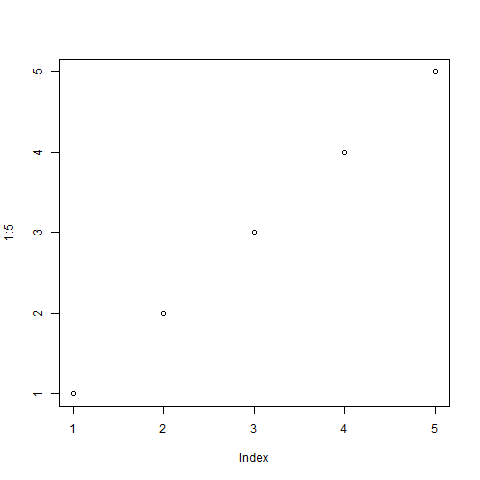

In [53]:
# run R codes
r.run('a <- 3')
r('a <- 3')
r(['a <- 3', 'b <- a*2', 'print(b)'])
print(repr(r.a))
print(repr(r.b))

r('png("abc.png"); plot(1:5); dev.off()') # plotting in R
from IPython.display import Image
Image(filename='abc.png')

In [37]:
# test for more data structure
print('\n\n-------Test without numpy & pandas----------')
r.avec = 0, 1, 2, 3, 4
r.alist = [1, (2, 3, 'any strings'), 4+5j]
r('amat <- matrix(0:11, nrow=3, byrow=TRUE)')
r('aary <- array(0:23, dim=c(3,4,2))')
r('adfm <- data.frame(aa=1:3, bb=paste("s", 2:4, sep="-"))')
print('\nR vector (avec): \n' + repr(r.avec))
print('\nR list (alist): \n' + repr(r.alist))
print('\nR matrix (amat): \n' + repr(r.amat))
print('\nR array (aary): \n' + repr(r.aary))
print('\nR data frame (adfm): \n' + repr(r.adfm))



-------Test without numpy & pandas----------

R vector (avec): 
array([0, 1, 2, 3, 4])

R list (alist): 
[1, [2, 3, 'any strings'], (4+5j)]

R matrix (amat): 
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

R array (aary): 
array([[[ 0,  3,  6,  9],
        [ 1,  4,  7, 10],
        [ 2,  5,  8, 11]],

       [[12, 15, 18, 21],
        [13, 16, 19, 22],
        [14, 17, 20, 23]]])

R data frame (adfm): 
    aa       bb
0     1  b's-2'
1     2  b's-3'
2     3  b's-4'


In [38]:
if has_numpy:
    print('\n\n-------Test with numpy----------')
    r.has_numpy = True
    arange, array, reshape = numpy.arange, numpy.array, numpy.reshape
    # numpy arrays
    # one-dimenstion numpy array will be converted to R vector
    r.bvec = arange(5)
    # two-dimenstion numpy array will be converted to R matrix
    r.bmat = reshape(arange(12), (3, 4)) # a 3-row, 4-column matrix
    # numpy array of three or higher dimensions will be converted to R array
    r.bary = reshape(arange(24), (2, 3, 4)) # a 3-row, 4-column, 2-layer array 
    # one-dimenstion numpy record array will be converted to R data.framme
    r.bdfm = array([(1, 'Joe', 35820.0), (2, 'Jane', 41235.0), (3, 'Kate', 37932.0)], \
            dtype=[('id', '<i4'), ('employee', '|S4'), ('salary', '<f4')])
    print('\nR vector (avec): \n' + repr(r['avec']))
    print('\nR vector (bvec): \n' + repr(r['bvec']))
    print('\nR matrix (amat): \n' + repr(r['amat']))
    print('\nR matrix (bamat): \n' + repr(r['bmat']))
    print('\nR array (aary): \n' + repr(r['aary']))
    print('\nR array (bary): \n' + repr(r['bary']))
    print('\nR data frame (adfm): \n' + repr(r['adfm']))
    print('\nR data frame (bdfm): \n' + repr(r['bdfm']))



-------Test with numpy----------

R vector (avec): 
array([0, 1, 2, 3, 4])

R vector (bvec): 
array([0, 1, 2, 3, 4])

R matrix (amat): 
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

R matrix (bamat): 
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

R array (aary): 
array([[[ 0,  3,  6,  9],
        [ 1,  4,  7, 10],
        [ 2,  5,  8, 11]],

       [[12, 15, 18, 21],
        [13, 16, 19, 22],
        [14, 17, 20, 23]]])

R array (bary): 
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

R data frame (adfm): 
    aa       bb
0     1  b's-2'
1     2  b's-3'
2     3  b's-4'

R data frame (bdfm): 
    id  employee   salary 
0     1   b'Joe'     35820
1     2  b'Jane'     41235
2     3  b'Kate'     37932


In [39]:
if has_pandas:
    print('\n\n-------Test with pandas----------')
    r.has_pandas = True
    print('\nR data frame (adfm): \n' + repr(r.adfm))
    if has_numpy:
        print('\nR data frame (bdfm): \n' + repr(r['bdfm']))



-------Test with pandas----------

R data frame (adfm): 
    aa       bb
0     1  b's-2'
1     2  b's-3'
2     3  b's-4'

R data frame (bdfm): 
    id  employee   salary 
0     1   b'Joe'     35820
1     2  b'Jane'     41235
2     3  b'Kate'     37932


In [54]:
# test huge data sets and the function runR
print('\n\n-------Test for huge data sets----------\n')
a = range(1000000) #00)
sa = 'a <- ' + Str4R(a)
rlt = runR(sa, Robj=r) # If you want to launch a new R process. use "runR(sa)" or "runR(sa, Robj='path_to_R')" instead.
print(rlt)

print('\nTest passed!\n\n')

#del(r) # to eliminate the possible DOS windows

# to use an R on remote server, you need to provide correct parameter to initialize the R instance:
# rsrv = R(RCMD='/usr/local/bin/R', host='My_server_name_or_IP', user='username')



-------Test for huge data sets----------

try({source("d:/temp/tmp0cvyjnoz")})
> file.remove('d:/temp/tmp0cvyjnoz')
[1] TRUE


Test passed!




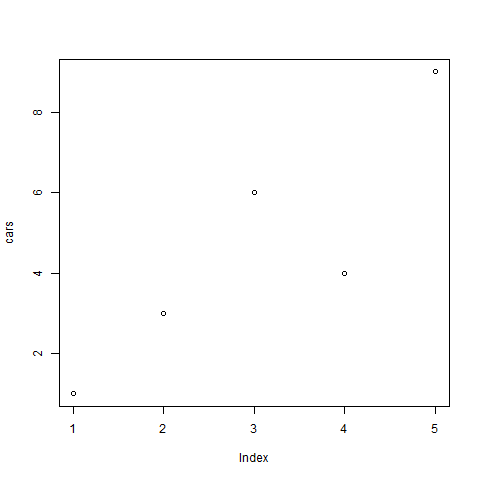

In [55]:
r.run("""
# Define the cars vector with 5 values
cars <- c(1, 3, 6, 4, 9);

# Graph the cars vector with all defaults
png("cars.png"); 
plot(cars);
dev.off()
""")

Image(filename='cars.png')

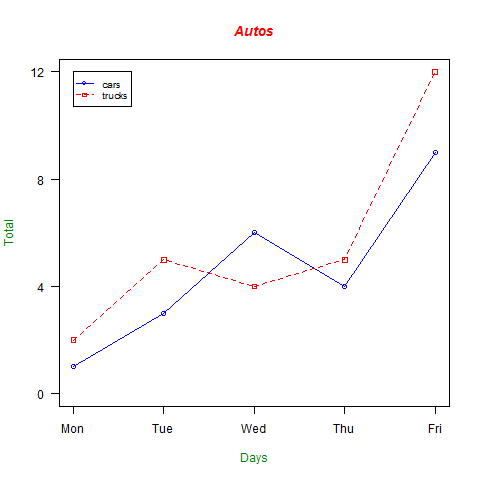

In [57]:
r.run("""
# put the plot into a png file
png("cars2.png"); 

# Define 2 vectors
cars <- c(1, 3, 6, 4, 9)
trucks <- c(2, 5, 4, 5, 12)

# Calculate range from 0 to max value of cars and trucks
g_range <- range(0, cars, trucks)

# Graph autos using y axis that ranges from 0 to max 
# value in cars or trucks vector.  Turn off axes and 
# annotations (axis labels) so we can specify them ourself
plot(cars, type="o", col="blue", ylim=g_range, 
   axes=FALSE, ann=FALSE)

# Make x axis using Mon-Fri labels
axis(1, at=1:5, lab=c("Mon","Tue","Wed","Thu","Fri"))

# Make y axis with horizontal labels that display ticks at 
# every 4 marks. 4*0:g_range[2] is equivalent to c(0,4,8,12).
axis(2, las=1, at=4*0:g_range[2])

# Create box around plot
box()

# Graph trucks with red dashed line and square points
lines(trucks, type="o", pch=22, lty=2, col="red")

# Create a title with a red, bold/italic font
title(main="Autos", col.main="red", font.main=4)

# Label the x and y axes with dark green text
title(xlab="Days", col.lab=rgb(0,0.5,0))
title(ylab="Total", col.lab=rgb(0,0.5,0))

# Create a legend at (1, g_range[2]) that is slightly smaller 
# (cex) and uses the same line colors and points used by 
# the actual plots 
legend(1, g_range[2], c("cars","trucks"), cex=0.8, 
   col=c("blue","red"), pch=21:22, lty=1:2);

#close the png file
dev.off()
""")

Image(filename='cars2.png')